## 算法输出结果的标准化

In [1]:
import os
import numpy as np
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [2]:
# data for experiment

x_dex = np.linspace(1,200,1000)

# y
train = np.sin(x_dex[:600])
valid = np.sin(x_dex[600:800])
test = np.sin(x_dex[800:])

# x
x1 = x_dex[:600]
x2 = x_dex[600:800]
x3 = x_dex[800:]

# xd
xd1 = pd.date_range('1/1/2015 12:00:00',periods=600)
xd2 = pd.date_range('8/22/2016 12:00:00',periods=200)
xd3 = pd.date_range('3/9/2017 12:00:00',periods=200)

# predict
pred = test+np.random.random(xd3.shape[0])-0.5

# error
e1 = pred-test
e2 = e1/test*100

In [3]:
def p_error(e,test_dex,save_name,opt=1,way=1):

    '''
    e: error value
    save_name: save picture name
    opt: 1 for date format of x-axis and 0 for index format
    way: 1 for value and 0 for percent of error
    '''
    
    font_size = 14
    font_name = 'Times New Roman'

    if opt == 1:
        test_dex = list(map(lambda x:parser.parse(str(x)),xd3.values))

    elif opt ==0:
        test_dex = x3

    plt.figure(figsize=(12,6),dpi=200)

    plt.plot(test_dex, e, linewidth=1.0, linestyle='-')
    tt = 'Error Value' if way == 1 else 'Error Percent'
    plt.title(tt,fontdict={'family' : font_name, 'size': font_size+2})
    plt.gcf().autofmt_xdate()
    plt.xlabel('DateTime',fontdict={'family' : font_name, 'size': font_size})
    plt.ylabel('Values',fontdict={'family' : font_name, 'size': font_size})
    plt.grid()
    plt.savefig(save_name+'_'+str(way)+'.jpg',dpi=200)
# -----------------------------------------------------------------------------------------    
def p_rst(x,test,pred,save_name,opt=1):

    '''
    x:index of real/predict data
    test: real data
    pred: predict data
    save_name: save picture name
    opt: 1 for date format of x-axis and 0 for index format
    '''
    
    font_size = 14
    font_name = 'Times New Roman'
    
    if opt == 1:
        test_dex = list(map(lambda x:parser.parse(str(x)),x.values))

    elif opt ==0:
        test_dex = x

    plt.figure(figsize=(12,6),dpi=200)  
    plt.plot(test_dex, test, linewidth=1.0, linestyle='-', label='Real')
    plt.plot(test_dex, pred, linewidth=1.0, linestyle='-', label='Prediction')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.title('Real and Prediction',fontdict={'family' : font_name, 'size': font_size+2})
    plt.xlabel('DateTime',fontdict={'family' : font_name, 'size': font_size})
    plt.ylabel('Values',fontdict={'family' : font_name, 'size': font_size})
    plt.grid()
    plt.savefig(save_name+'.jpg',dpi=200)
    plt.show()
# -----------------------------------------------------------------------------------------
def p_data(x1,x2,x3,train,valid,test,save_name,opt=1):
    
    '''
    x1: index for train
    x2: index for valid
    x3: index for test
    y1: value of train
    y2: value of valid
    y3: vakue of test
    save_name: name of picture
    opt: 1 for date format of x-axis and 0 for index format
    '''
    

    font_size = 14
    font_name = 'Times New Roman'

    if opt == 1:
        train_dex = list(map(lambda x:parser.parse(str(x)),x1.values))
        valid_dex = list(map(lambda x:parser.parse(str(x)),x2.values))
        test_dex = list(map(lambda x:parser.parse(str(x)),x3.values))

    elif opt ==0:
        train_dex = x1
        valid_dex = x2
        test_dex = x3

    plt.figure(figsize=(12,6),dpi=200)  
    plt.plot(train_dex, train, linewidth=1.0, linestyle='-', label='Train')
    plt.plot(valid_dex, valid, linewidth=1.0, linestyle='-', label='Valid')
    plt.plot(test_dex, test, linewidth=1.0, linestyle='-', label='Test')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.title('Original Data',fontdict={'family' : font_name, 'size': font_size+2})
    plt.xlabel('DateTime',fontdict={'family' : font_name, 'size': font_size})
    plt.ylabel('Values',fontdict={'family' : font_name, 'size': font_size})
    plt.grid()
    plt.savefig(save_name+'.jpg',dpi=200)

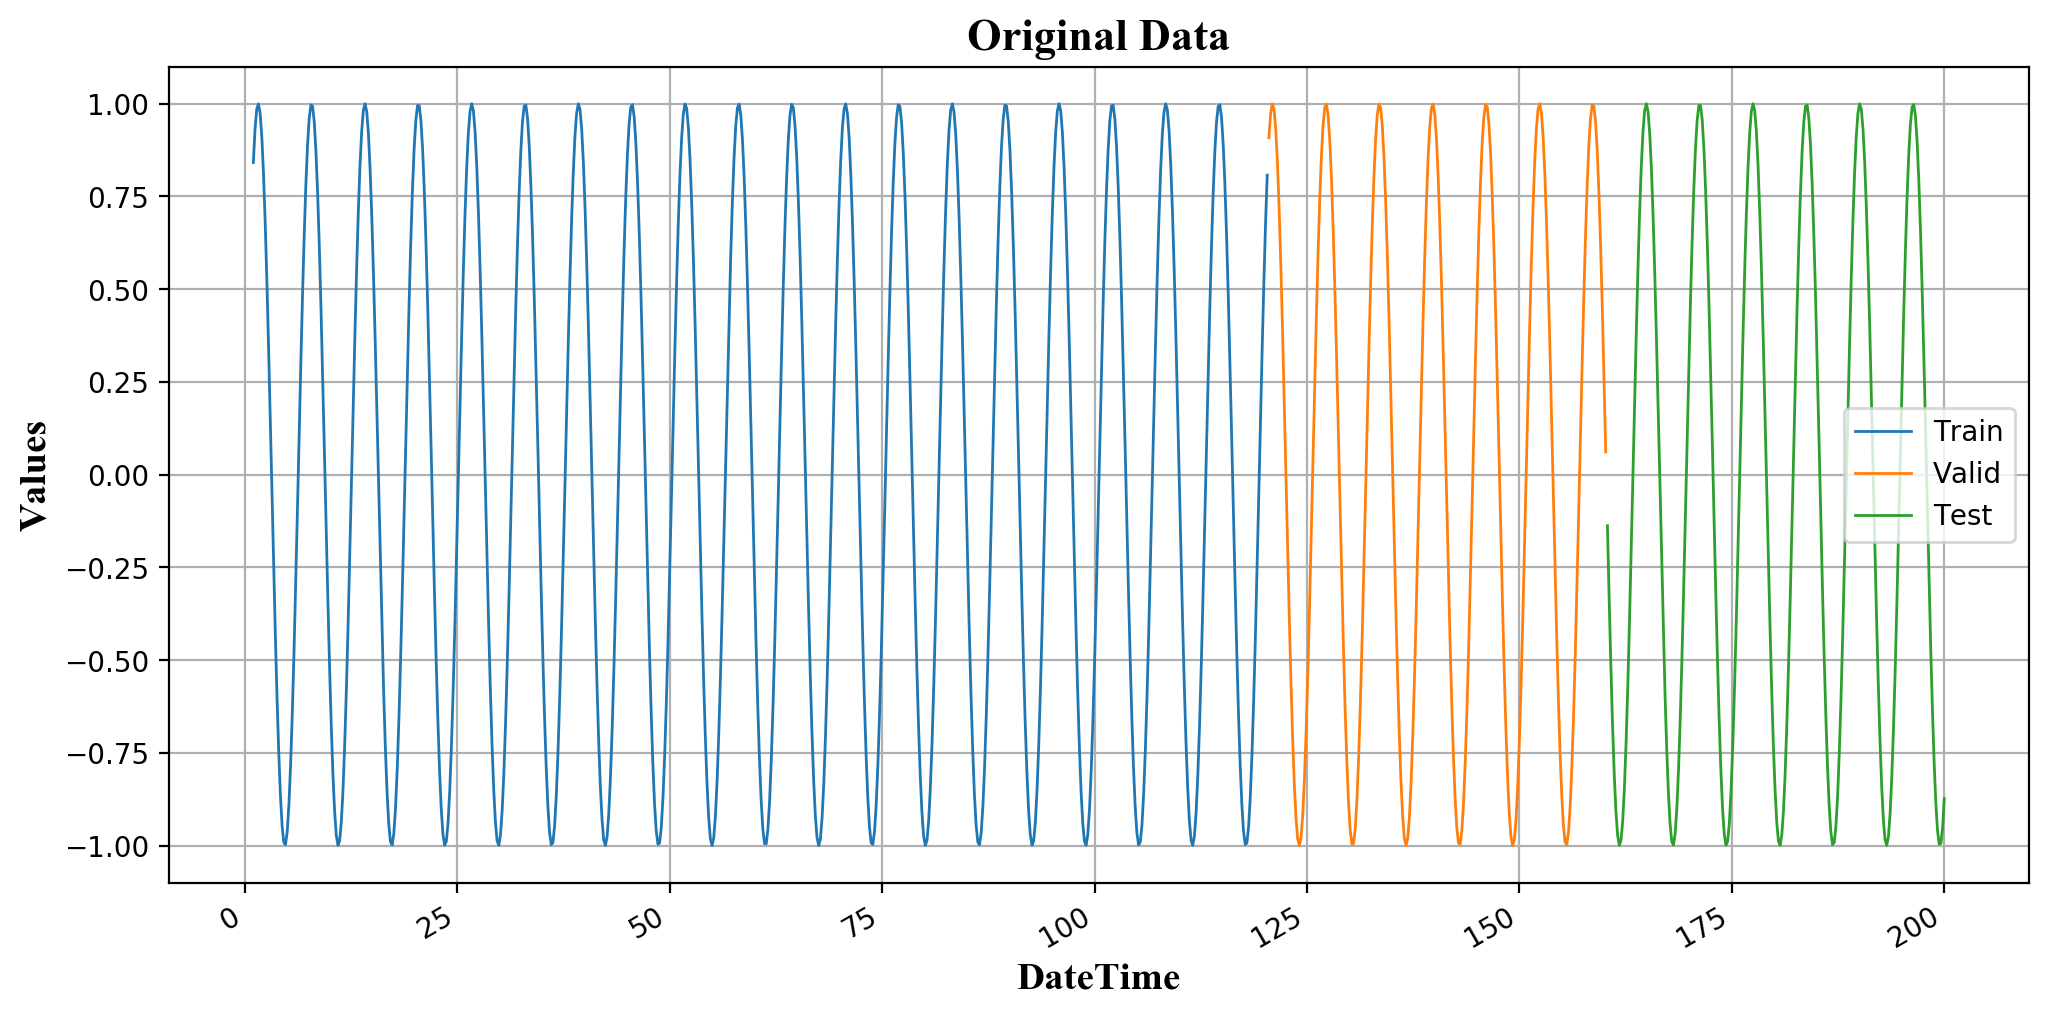

In [10]:
#p_error(e2,x3,'yy',opt=0,way=0)
# p_rst(x3,test,pred,'yyy',opt=0)
p_data(x1,x2,x3,train,valid,test,'yanchuan',opt=0)

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.12.0'